<a href="https://colab.research.google.com/github/GouthamKumar-R/Time-series/blob/main/HHI_Fb_prophet_AIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIF Time Series Assignment

Group No. 4 members
* Chithra Nair
* David Jose Paliakkara
* Kaviya U C
* Gautam Periyaswamy
* Goutham Kumar R
* Roopini Mohanchander
* Saurabh Gupta

This Notebook was created in google colab- for better readability use the below link.
* https://colab.research.google.com/drive/1oHp9ypqXpTUjeXOIsIgAs7ustCa86K3J?usp=sharing

**Objective**: <br/>
Forecast Median HHI for the given timeperiod: January-2019 to December-2022, using historic data available from January-2004 till December-2018. (We would take data from July-2017 to December-2018 as hold out data to check the model performance).

**Notebook Summary:**<br/>
In this Notebook, 
* We have done basic EDA
* Stationarity test
* Heuristic method -Double Exponential smoothing(DES)
* Evaluation for DES (Rsq = 0.831)
* Facebook Prophet 
* Hperparameter optimisation
* Evaluation for Prophet model

Final, <br/>
**Rsquared achieved : 0.969** 

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import fbprophet
from fbprophet import Prophet

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving HHI-test.xlsx to HHI-test.xlsx
Saving HHI-train.xlsx to HHI-train.xlsx


## Importing Dataset

In [119]:
import io

train_df = pd.read_excel(io.BytesIO(uploaded['HHI-train.xlsx']))
test_df = pd.read_excel(io.BytesIO(uploaded['HHI-test.xlsx']))

In [120]:
df = train_df
df.head()

,Metric,Median Household Income
0,2004-01-28,43996.755165
1,2004-02-28,44072.814835
2,2004-03-28,44154.120000
3,2004-04-28,44250.420000
4,2004-05-28,44349.930000


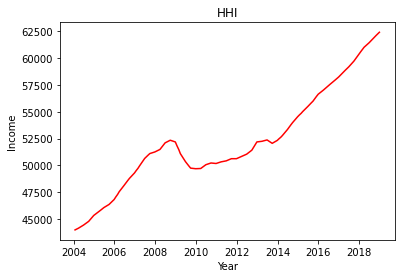

In [121]:
#Plotting
plt.plot(df["Metric"], df["Median Household Income"],'r')
plt.title("HHI")
plt.xlabel("Year")
plt.ylabel("Income")
plt.show();

In [122]:
#change datetype
df["Metric"] = pd.to_datetime(df["Metric"])
df.head()

,Metric,Median Household Income
0,2004-01-28,43996.755165
1,2004-02-28,44072.814835
2,2004-03-28,44154.120000
3,2004-04-28,44250.420000
4,2004-05-28,44349.930000


In [123]:
df.dtypes

Metric                     datetime64[ns]
Median Household Income           float64
dtype: object

In [124]:
#first order Differencing
df["Diff"]=df["Median Household Income"].diff()

In [125]:
#second order Differencing
df["Diff2"]=df["Diff"].diff()

In [126]:
df.head()

,Metric,Median Household Income,Diff,Diff2
0,2004-01-28,43996.755165,NaN,NaN
1,2004-02-28,44072.814835,76.059670,NaN
2,2004-03-28,44154.120000,81.305165,5.245494
3,2004-04-28,44250.420000,96.300000,14.994835
4,2004-05-28,44349.930000,99.510000,3.210000


In [127]:
df.dtypes

Metric                     datetime64[ns]
Median Household Income           float64
Diff                              float64
Diff2                             float64
dtype: object

## Stationarity test

**Augmented Dickey-Fuller Test**
This is a statistical procedure to suss out whether a time series is stationary or not.Things to do

Frame Hypothesis

* Null hypothesis: the series is nonstationary.
* Alternative hypothesis: the series is stationary.
Like any statistical test you should set a significance level or threshold that determines whether you should accept or reject the null.

In [128]:
#library
from statsmodels.tsa.stattools import adfuller
#passing stationary TS
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df["Diff2"][2:])
print("1. ADF: {0};\n2. p-value: {1};".format(adf,pvalue))
print("3. Critical values:\n",critical_values)

1. ADF: -6.568862598275265;
2. p-value: 8.029903501692007e-09;
3. Critical values:
 {'1%': -3.469648263987657, '5%': -2.878798906308495, '10%': -2.5759713094779593}


Interperting the Results:

1. adf is the value of the test statistic. 
2. The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -6.5688.<br/>
pvalue is interpreted like any p-value. Once we set a threshold, we can compare this p-value to that threshold. Either we reject or fail to reject the null.<br/>Here pvalue is very close to zero (~$10^{-9}$) so we reject the null that this data is nonstationary.
3. The critical_values variable provides test statistic threholds for common significant levels. Here we see a test statistic of roughly -2.89 and lower is sufficient to reject the null using a significance level of 5%.
> From these reults, we can say that the TS is stationary.

## ACF and PACF plots

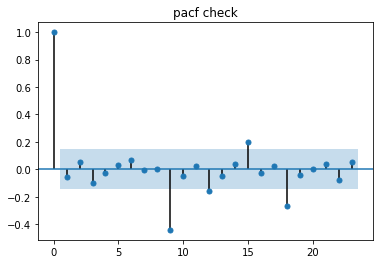

In [129]:
#library
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig = sm.tsa.graphics.plot_pacf(df["Diff2"][2:], alpha=0.05, title = 'pacf check')

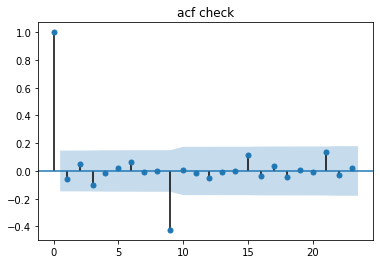

In [86]:
fig = sm.tsa.graphics.plot_acf(df["Diff2"][2:], alpha=0.05, title = 'acf check')

# Double Expoential Smoothing

In [114]:
#library
from statsmodels.tsa.api import Holt

train_ds = train_data['y']
des = Holt(train_ds).fit(optimized=True)
des_preds = des.forecast(len(valdiation_data))

des_preds

162    59323.727483
163    59474.992859
164    59626.258235
165    59777.523612
166    59928.788988
167    60080.054364
168    60231.319741
169    60382.585117
170    60533.850493
171    60685.115870
172    60836.381246
173    60987.646622
174    61138.911999
175    61290.177375
176    61441.442751
177    61592.708128
178    61743.973504
179    61895.238880
dtype: float64

In [115]:
rmse_des = mean_squared_error(yactual, des_preds, squared=False)
rmse_des

383.3693480472215

In [116]:
r2_des = r2_score(yactual, des_preds)
r2_des

0.8315583741888694

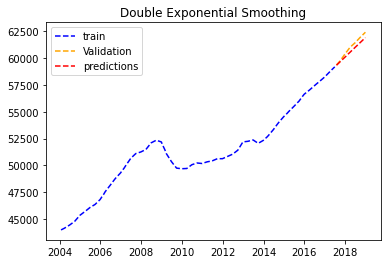

In [130]:
#plotting
plt.plot(train_data['ds'],train_data['y'] , 'b--', label="train")
plt.plot(valdiation_data['ds'], valdiation_data['y'], color='orange', linestyle="--", label="Validation")
plt.plot(valdiation_data['ds'], des_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing");

# Facebook Prophet

**Prophet** is an general additive model that includes a number of highly advanced, intelligent forecasting methods, including changepoint analysis:

_y = g(t) + s(t) + h(t) + $\epsilon_t$_

Here g(t) is the trend function which models non-periodic changes in the value of the time series, s(t) represents periodic changes (e.g., weekly and yearly seasonality), and h(t) represents the effects of holidays which occur on potentially irregular schedules over one or more days

* For trend, a piecewise linear or logistic growth curve trend is used.
** Prophet automatically detects changes in trends by selecting changepoints from the data.
* For seasonalities, different seasonality components are modeled using Fourier series.
* One can either use fb provided list or incorporate their own holidays into model.


Prophet was originally optimized with the business forecast tasks encountered at Facebook in mind, which typically have any of the following characteristics:

* Hourly, daily, or weekly observations with at least a few months (preferably a year) of history
* Strong multiple “human-scale” seasonalities: day of week and time of year
* Important holidays that occur at irregular intervals that are known in advance
* A reasonable number of missing observations or large outliers
* Historical trend changes, for instance due to product launches or logging changes
* Trends that are non-linear growth curves, where a trend hits a natural limit or saturates


Technical details behind prophet: built around a generalized additive model (GAM)

In [87]:
df = train_df

In [88]:
#change datetype
df["Metric"] = pd.to_datetime(df["Metric"])
df.head()

,Metric,Median Household Income,Diff,Diff2
0,2004-01-28,43996.755165,NaN,NaN
1,2004-02-28,44072.814835,76.059670,NaN
2,2004-03-28,44154.120000,81.305165,5.245494
3,2004-04-28,44250.420000,96.300000,14.994835
4,2004-05-28,44349.930000,99.510000,3.210000


In [89]:
#prophet takes input column as ds and y
df = df.rename(columns={"Metric":"ds", "Median Household Income":"y"})
df = df[['ds','y']]
df

,ds,y
0,2004-01-28,43996.755165
1,2004-02-28,44072.814835
2,2004-03-28,44154.120000
3,2004-04-28,44250.420000
4,2004-05-28,44349.930000
...,...,...
175,2018-08-31,61761.472609
176,2018-09-30,61927.190000
177,2018-10-31,62084.740761
178,2018-11-30,62237.209239


In [90]:
#model initalisation
from fbprophet import Prophet
model = Prophet()

In [91]:
#train data till Jun 2017
#valdiation data from july 2017
train_data = df[:162]
valdiation_data = df[162:]

train_data.tail()

,ds,y
157,2017-02-28,58547.034889
158,2017-03-31,58714.180000
159,2017-04-30,58865.238242
160,2017-05-31,59021.331758
161,2017-06-30,59172.390000


In [92]:
# let's fit our model
model.fit(train_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
# creating placeholder for validation data
future_df = model.make_future_dataframe(periods=18, freq="M")
future_df

,ds
0,2004-01-28
1,2004-02-28
2,2004-03-28
3,2004-04-28
4,2004-05-28
...,...
175,2018-08-31
176,2018-09-30
177,2018-10-31
178,2018-11-30


In [94]:
valdiation_data

,ds,y
162,2017-07-31,59351.930543
163,2017-08-31,59531.471087
164,2017-09-30,59705.220000
165,2017-10-31,59930.687717
166,2017-11-30,60148.882283
167,2017-12-31,60374.350000
168,2018-01-31,60587.712667
169,2018-02-28,60780.427333
170,2018-03-31,60993.790000
171,2018-04-30,61133.965824


In [95]:
#Let's forecast
forecast_df = model.predict(future_df)
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-28,43974.459177,43888.002417,44049.421151,43974.459177,43974.459177,-8.227155,-8.227155,-8.227155,-8.227155,-8.227155,-8.227155,0.0,0.0,0.0,43966.232022
1,2004-02-28,44072.397337,43987.587912,44147.225489,44072.397337,44072.397337,-10.839719,-10.839719,-10.839719,-10.839719,-10.839719,-10.839719,0.0,0.0,0.0,44061.557618
2,2004-03-28,44164.016907,44049.447375,44212.254213,44164.016907,44164.016907,-26.523005,-26.523005,-26.523005,-26.523005,-26.523005,-26.523005,0.0,0.0,0.0,44137.493902
3,2004-04-28,44261.955067,44164.135555,44332.362887,44261.955067,44261.955067,-13.440426,-13.440426,-13.440426,-13.440426,-13.440426,-13.440426,0.0,0.0,0.0,44248.514641
4,2004-05-28,44356.733932,44268.821408,44429.347526,44356.733932,44356.733932,-0.017248,-0.017248,-0.017248,-0.017248,-0.017248,-0.017248,0.0,0.0,0.0,44356.716685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2018-08-31,61422.404313,60285.077760,62837.342163,60259.699942,62775.364359,16.758111,16.758111,16.758111,16.758111,16.758111,16.758111,0.0,0.0,0.0,61439.162424
176,2018-09-30,61576.030565,60229.429350,63057.198921,60261.887699,63090.269612,-35.677875,-35.677875,-35.677875,-35.677875,-35.677875,-35.677875,0.0,0.0,0.0,61540.352690
177,2018-10-31,61734.777692,60255.640137,63408.966461,60308.263361,63422.962053,-23.315583,-23.315583,-23.315583,-23.315583,-23.315583,-23.315583,0.0,0.0,0.0,61711.462109
178,2018-11-30,61888.403944,60213.179725,63748.133198,60241.080371,63743.485057,-7.491724,-7.491724,-7.491724,-7.491724,-7.491724,-7.491724,0.0,0.0,0.0,61880.912220


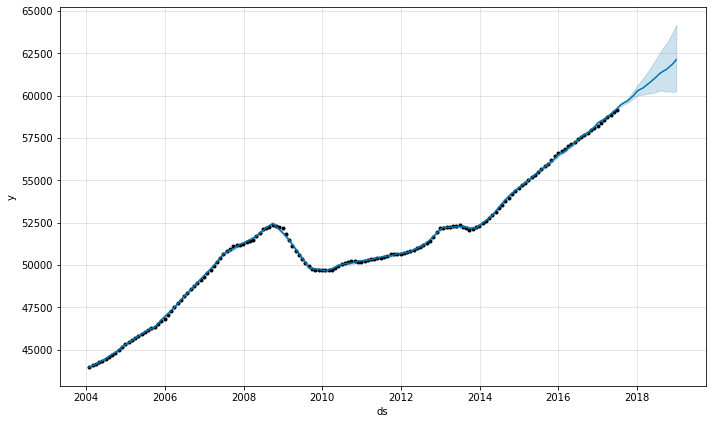

In [96]:
#plotting
model.plot(forecast_df);

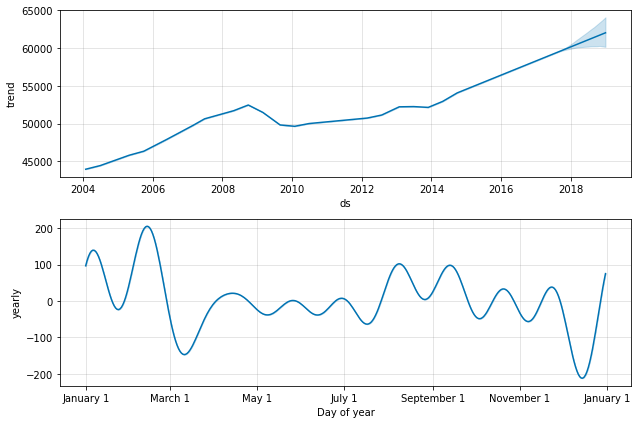

In [97]:
#Components
model.plot_components(forecast_df);

## Evaluation for validation data

In [98]:
#forecasting for validation dataset
yhat_forecast = forecast_df["yhat"][162:]
yhat_forecast

162    59442.342707
163    59571.498578
164    59669.706146
165    59840.391934
166    60008.274050
167    60253.139855
168    60372.076682
169    60458.932679
170    60627.261205
171    60773.256651
172    60946.181906
173    61112.308574
174    61308.662326
175    61439.162424
176    61540.352690
177    61711.462109
178    61880.912220
179    62117.533517
Name: yhat, dtype: float64

In [99]:
yactual = valdiation_data["y"]
yactual

162    59351.930543
163    59531.471087
164    59705.220000
165    59930.687717
166    60148.882283
167    60374.350000
168    60587.712667
169    60780.427333
170    60993.790000
171    61133.965824
172    61278.814176
173    61418.990000
174    61590.231304
175    61761.472609
176    61927.190000
177    62084.740761
178    62237.209239
179    62394.760000
Name: y, dtype: float64

In [101]:
#RMSE for validation data
from sklearn.metrics import mean_squared_error

rmse_validation = mean_squared_error(yactual, yhat_forecast, squared=False)
rmse_validation

273.7203219821144

In [102]:
#R2 for validation data
from sklearn.metrics import r2_score 

r2_validation = r2_score(yactual, yhat_forecast)
r2_validation

0.9141325162865233

## Hyperparameter Optimisation

In [103]:
#Finetuning hyperparameters
from fbprophet import Prophet

changepoint_prior_scale = 0.5

tuned_model_2 = Prophet(changepoint_prior_scale=changepoint_prior_scale)

In [104]:
tuned_model_2.fit(train_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [105]:
test_df.shape

(48, 2)

In [106]:
# creating placeholder for test data
future_test_df = tuned_model_2.make_future_dataframe(periods=66,freq="M")
future_test_df

,ds
0,2004-01-28
1,2004-02-28
2,2004-03-28
3,2004-04-28
4,2004-05-28
...,...
223,2022-08-31
224,2022-09-30
225,2022-10-31
226,2022-11-30


In [107]:
#Forecast testdf
forecast_test_df = tuned_model_2.predict(future_test_df)
forecast_test_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-28,44004.876929,43926.915085,44073.749124,44004.876929,44004.876929,-4.124674,-4.124674,-4.124674,-4.124674,-4.124674,-4.124674,0.0,0.0,0.0,44000.752255
1,2004-02-28,44089.084272,44008.368068,44154.147131,44089.084272,44089.084272,-7.383246,-7.383246,-7.383246,-7.383246,-7.383246,-7.383246,0.0,0.0,0.0,44081.701026
2,2004-03-28,44167.858883,44078.750220,44219.697189,44167.858883,44167.858883,-22.940810,-22.940810,-22.940810,-22.940810,-22.940810,-22.940810,0.0,0.0,0.0,44144.918074
3,2004-04-28,44252.066226,44163.021829,44311.810421,44252.066226,44252.066226,-10.798072,-10.798072,-10.798072,-10.798072,-10.798072,-10.798072,0.0,0.0,0.0,44241.268155
4,2004-05-28,44333.557204,44256.612759,44411.807324,44333.557204,44333.557204,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,0.0,0.0,0.0,44333.385705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2022-08-31,68863.635709,50673.018132,85307.131340,50653.718140,85280.951192,11.116172,11.116172,11.116172,11.116172,11.116172,11.116172,0.0,0.0,0.0,68874.751881
224,2022-09-30,69016.724429,50314.446182,85884.679600,50342.451802,85908.938480,-41.621180,-41.621180,-41.621180,-41.621180,-41.621180,-41.621180,0.0,0.0,0.0,68975.103249
225,2022-10-31,69174.916107,50064.717947,86624.384663,50128.078571,86595.933317,-23.779565,-23.779565,-23.779565,-23.779565,-23.779565,-23.779565,0.0,0.0,0.0,69151.136542
226,2022-11-30,69328.004828,49926.444788,87248.207767,49892.700310,87235.572046,-3.373880,-3.373880,-3.373880,-3.373880,-3.373880,-3.373880,0.0,0.0,0.0,69324.630948


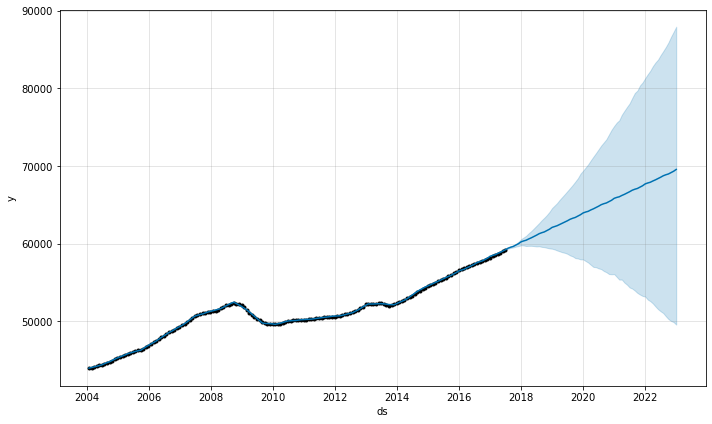

In [108]:
tuned_model_2.plot(forecast_test_df);

In [109]:
#subsetting df from jan2019 to dec2022
yhat_test = forecast_test_df['yhat'][180:]
yhat_test

180    62224.467819
181    62319.367125
182    62479.672426
183    62626.392114
184    62797.097488
185    62960.507794
186    63148.995669
187    63280.528769
188    63384.134208
189    63560.232480
190    63734.826927
191    63961.259481
192    64083.332629
193    64172.102338
194    64351.001457
195    64490.570359
196    64662.723547
197    64828.777449
198    65024.728404
199    65152.567900
200    65246.463388
201    65422.150025
202    65593.069704
203    65842.592567
204    65962.416444
205    66039.600807
206    66212.394312
207    66354.309268
208    66526.023590
209    66691.218638
210    66884.651369
211    67013.625587
212    67110.738662
213    67286.634139
214    67458.903793
215    67700.750541
216    67821.111425
217    67907.164143
218    68073.758338
219    68218.057262
220    68389.288897
221    68553.602078
222    68744.546106
223    68874.751881
224    68975.103249
225    69151.136542
226    69324.630948
227    69558.777988
Name: yhat, dtype: float64

In [110]:
test_df

,Metric,Median Household Income
0,2019-01-31,62550.345556
1,2019-02-28,62690.874444
2,2019-03-31,62846.460000
3,2019-04-30,62985.056703
4,2019-05-31,63128.273297
5,2019-06-30,63266.870000
6,2019-07-31,63422.638261
7,2019-08-31,63578.406522
8,2019-09-30,63729.150000
9,2019-10-31,63895.532391


In [111]:
y_test = test_df['Median Household Income']
y_test

0     62550.345556
1     62690.874444
2     62846.460000
3     62985.056703
4     63128.273297
5     63266.870000
6     63422.638261
7     63578.406522
8     63729.150000
9     63895.532391
10    64056.547609
11    64222.930000
12    64393.818352
13    64553.681648
14    64724.570000
15    64891.053516
16    65063.086484
17    65229.570000
18    65398.348152
19    65567.126304
20    65730.460000
21    65899.608804
22    66063.301196
23    66232.450000
24    66404.813444
25    66560.496556
26    66732.860000
27    66882.408352
28    67036.941648
29    67186.490000
30    67331.489130
31    67476.488261
32    67616.810000
33    67752.943804
34    67884.686196
35    68020.820000
36    68147.003778
37    68260.976222
38    68387.160000
39    68508.864396
40    68634.625604
41    68756.330000
42    68890.212935
43    69024.095870
44    69153.660000
45    69286.730870
46    69415.509130
47    69548.580000
Name: Median Household Income, dtype: float64

## Evaluation for Test data

In [112]:
rmse_test = mean_squared_error(y_test, yhat_test, squared=False)
rmse_test

370.79822840110756

In [113]:
r2_test = r2_score(y_test, yhat_test)
r2_test

0.9692948114221862

we achieved a R2 of 0.97 